In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
billDF=pd.read_csv(r'hot-100-current.csv',encoding = 'cp949')

In [3]:
billDF.head()

,chart_week,current_week,title,performer,last_week,peak_pos,wks_on_chart
0,2024-06-08,1,I Had Some Help,Post Malone Featuring Morgan Wallen,1.0,1,3
1,2024-06-08,2,Not Like Us,Kendrick Lamar,2.0,1,4
2,2024-06-08,3,Million Dollar Baby,Tommy Richman,3.0,2,5
3,2024-06-08,4,A Bar Song (Tipsy),Shaboozey,4.0,3,7
4,2024-06-08,5,Espresso,Sabrina Carpenter,6.0,4,7


In [4]:
## 분석에 관련없는 데이터 삭제

billDF.drop('last_week',axis=1,inplace=True)
billDF.drop('peak_pos',axis=1,inplace=True)
billDF.drop('wks_on_chart',axis=1,inplace=True)
billDF

,chart_week,current_week,title,performer
0,2024-06-08,1,I Had Some Help,Post Malone Featuring Morgan Wallen
1,2024-06-08,2,Not Like Us,Kendrick Lamar
2,2024-06-08,3,Million Dollar Baby,Tommy Richman
3,2024-06-08,4,A Bar Song (Tipsy),Shaboozey
4,2024-06-08,5,Espresso,Sabrina Carpenter
...,...,...,...,...
343595,1958-08-04,96,Over And Over,Thurston Harris
343596,1958-08-04,97,I Believe In You,Robert & Johnny
343597,1958-08-04,98,Little Serenade,The Ames Brothers
343598,1958-08-04,99,I'll Get By (As Long As I Have You),Billy Williams


In [5]:
#2024년 데이터만 추출

bill=billDF[:2300]
bill['score']=0
bill['title']=bill['title'].str.lower()

C:\Users\KDP-30\AppData\Local\Temp\ipykernel_21432\1094406922.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bill['score']=0
C:\Users\KDP-30\AppData\Local\Temp\ipykernel_21432\1094406922.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bill['title']=bill['title'].str.lower()


In [6]:
for row in bill.index:
    bill.loc[row,'score']=101-bill.loc[row,'current_week']

In [7]:
bill_title=bill['title'].value_counts()
bill_title

title
feather                     23
stick season                23
agora hills                 23
greedy                      23
lovin on me                 23
                            ..
stranger                     1
wildflower and barley        1
scared of my guitar          1
best for me                  1
dj play a christmas song     1
Name: count, Length: 429, dtype: int64

In [8]:
bill_score=pd.DataFrame(index=['score'])
for name in bill_title.index:
    bill_score[name]=0
    for row in bill.index:
        if bill.loc[row,'title']==name:
            bill_score[name]=bill_score[name]+bill.loc[row,'score']
bill_score

C:\Users\KDP-30\AppData\Local\Temp\ipykernel_21432\3768610376.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bill_score[name]=0
C:\Users\KDP-30\AppData\Local\Temp\ipykernel_21432\3768610376.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bill_score[name]=0
C:\Users\KDP-30\AppData\Local\Temp\ipykernel_21432\3768610376.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(

,feather,stick season,agora hills,greedy,lovin on me,i remember everything,wild ones,lose control,fe!n,cruel summer,...,wtfym,seen it all,so american,where my twin @,punteria,stranger,wildflower and barley,scared of my guitar,best for me,dj play a christmas song
score,1487,1930,1862,1968,2142,2024,1228,2148,798,1861,...,49,47,43,39,29,26,13,11,8,11


In [9]:
bill_score=bill_score.T
bill_score['Artist']=''
for row in bill_score.index:
    for row2 in bill.index:
        if row==bill.loc[row2,'title']:
            bill_score.loc[row,'Artist']=bill.loc[row2,'performer']
            continue
bill_score.index.name='Track'
bill_score=bill_score.reset_index()
bill_score.set_index(['Track','Artist'],inplace=True)
bill_score

,,score
Track,Artist,
feather,Sabrina Carpenter,1487
stick season,Noah Kahan,1930
agora hills,Doja Cat,1862
greedy,Tate McRae,1968
lovin on me,Jack Harlow,2142
...,...,...
stranger,Olivia Rodrigo,26
wildflower and barley,Hozier & Allison Russell,13
scared of my guitar,Olivia Rodrigo,11


In [10]:
streamDF=pd.read_csv('Most Streamed Spotify Songs 2024.csv',encoding='cp1252',thousands=',')

In [11]:
streamDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   int64  
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   float64
 8   Spotify Playlist Count      4530 non-null   float64
 9   Spotify Playlist Reach      4528 non-null   float64
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   float64
 12  YouTube Likes               4285 non-null   float64
 13  TikTok Posts                3427 

In [12]:
youtube=streamDF[['Track','Artist','YouTube Views','YouTube Likes']]
youtube['Track']=youtube['Track'].str.lower()
youtube.set_index(['Track','Artist'],inplace=True)

C:\Users\KDP-30\AppData\Local\Temp\ipykernel_21432\3457761425.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  youtube['Track']=youtube['Track'].str.lower()


In [13]:
dataDF=bill_score.join(youtube)
dataDF

score  YouTube Views  \
Track                    Artist                                            
feather                  Sabrina Carpenter           1487     88126911.0   
stick season             Noah Kahan                  1930     89431811.0   
agora hills              Doja Cat                    1862     48045203.0   
greedy                   Tate McRae                  1968    141646818.0   
                         Tate McRae                  1968            NaN   
...                                                   ...            ...   
stranger                 Olivia Rodrigo                26            NaN   
wildflower and barley    Hozier & Allison Russell      13            NaN   
scared of my guitar      Olivia Rodrigo                11            NaN   
best for me              Joyner Lucas & Jelly Roll      8            NaN   
dj play a christmas song Cher                          11            NaN   

                                                    YouTube Likes  
Track                    Artist                                    
feather                  Sabrina Carpenter              1378287.0  
stick season             Noah Kahan                      659870.0  
agora hills              Doja Cat                        986278.0  
greedy                   Tate McRae                     1514837.0  
                         Tate McRae                           NaN  
...                                                           ...  
stranger                 Olivia Rodrigo                       NaN  
wildflower and barley    Hozier & Allison Russell             NaN  
scared of my guitar      Olivia Rodrigo                       NaN  
best for me              Joyner Lucas & Jelly Roll            NaN  
dj play a christmas song Cher                                 NaN  

[453 rows x 3 columns]

In [14]:
dataDF.describe()

,score,YouTube Views,YouTube Likes
count,453.000000,1.690000e+02,1.690000e+02
mean,302.560706,6.108222e+07,7.845550e+05
std,424.787447,1.229013e+08,1.272023e+06
min,1.000000,5.174500e+04,4.110000e+02
25%,47.000000,7.636074e+06,1.146280e+05
50%,104.000000,2.121340e+07,2.866280e+05
75%,388.000000,6.212310e+07,9.591750e+05
max,2148.000000,1.096101e+09,1.062980e+07


In [15]:
dataDF.dropna(inplace=True)
dataDF=dataDF.reset_index()
dataDF.set_index('Track')
dataDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Track          169 non-null    object 
 1   Artist         169 non-null    object 
 2   score          169 non-null    int64  
 3   YouTube Views  169 non-null    float64
 4   YouTube Likes  169 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 6.7+ KB


In [16]:
dataDF.duplicated().sum()
dataDF=dataDF.sort_values('score',ascending=False,ignore_index=True)
dataDF

,Track,Artist,score,YouTube Views,YouTube Likes
0,lose control,Teddy Swims,2148,139180960.0,1504385.0
1,lovin on me,Jack Harlow,2142,131148091.0,1392593.0
2,greedy,Tate McRae,1968,141646818.0,1514837.0
3,stick season,Noah Kahan,1930,89431811.0,659870.0
4,agora hills,Doja Cat,1862,48045203.0,986278.0
...,...,...,...,...,...
164,"burn, burn, burn",Zach Bryan,8,23316855.0,136558.0
165,when it comes to you,Fridayy,7,51105810.0,440385.0
166,sabor fresa,Fuerza Regida,4,151406654.0,886902.0
167,easy,LE SSERAFIM,2,139498636.0,1771124.0


In [17]:
datacor=dataDF.corr(numeric_only=True)
datacor

,score,YouTube Views,YouTube Likes
score,1.000000,0.322623,0.280674
YouTube Views,0.322623,1.000000,0.907941
YouTube Likes,0.280674,0.907941,1.000000


In [18]:
# 한글 폰트 설정 => 폰트 매니저 모듈 사용
from matplotlib import font_manager as fm
from matplotlib import rc

# 적용할 폰트 파일
Font_file=r'C:\Windows\Fonts\gulim.ttc'

# 폰트 패밀리 이름 가져오기
font_name=fm.FontProperties(fname=Font_file).get_name()

# 새로운 폰트 패밀리 이름지정
rc('font',family=font_name)

Text(0.5, 1.0, '빌보드 점수')

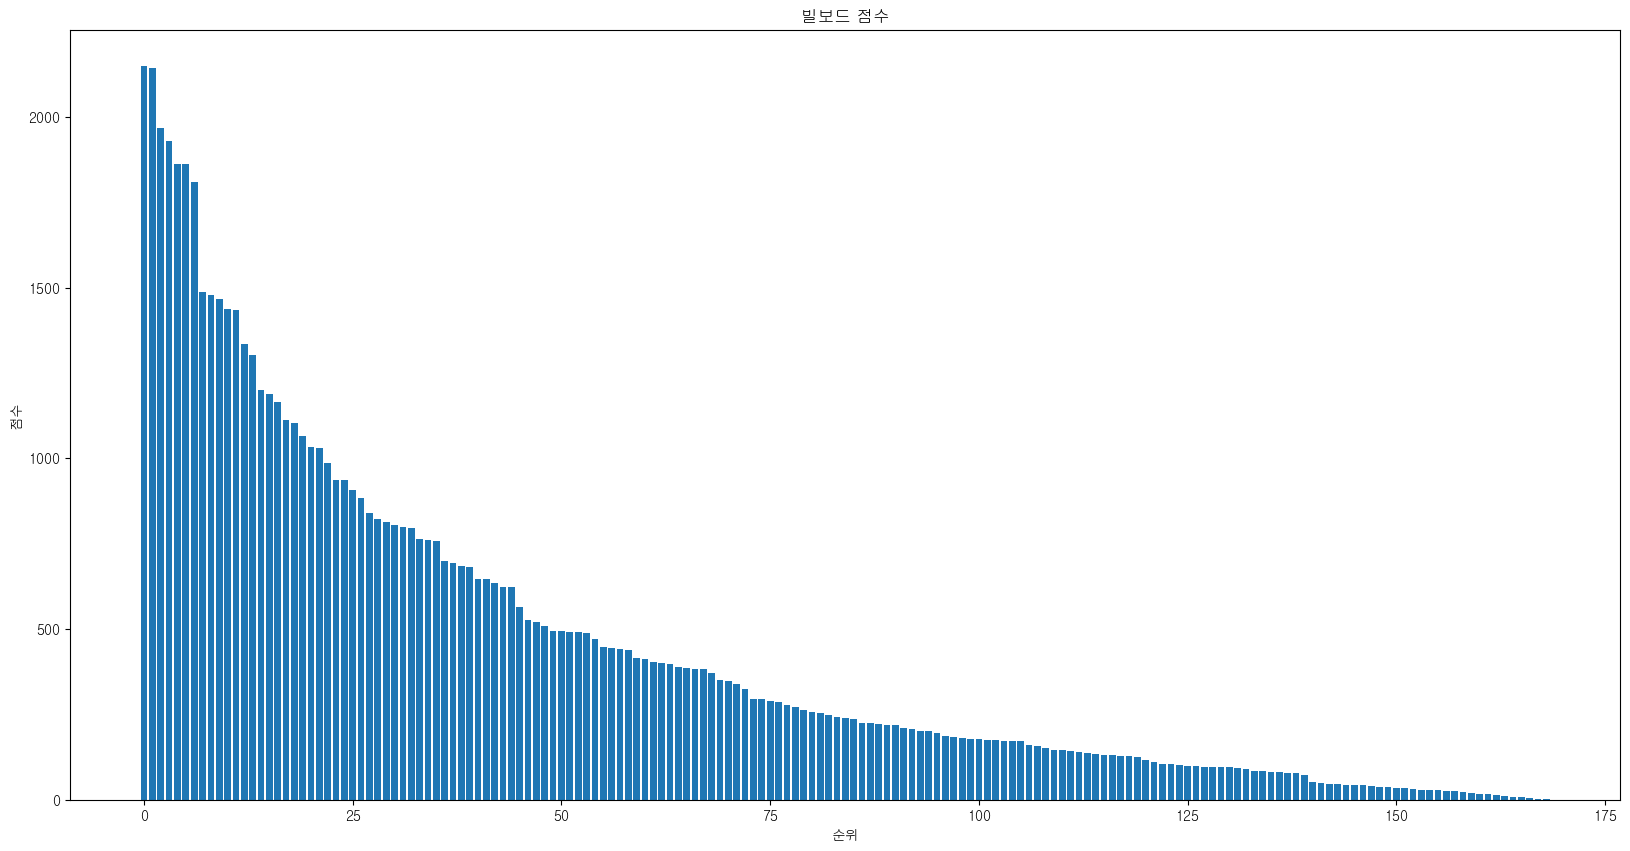

In [19]:
plt.figure(figsize=(20,10))
plt.bar(dataDF.index,dataDF['score'])
plt.xlabel('순위')
plt.ylabel('점수')
plt.title('빌보드 점수')

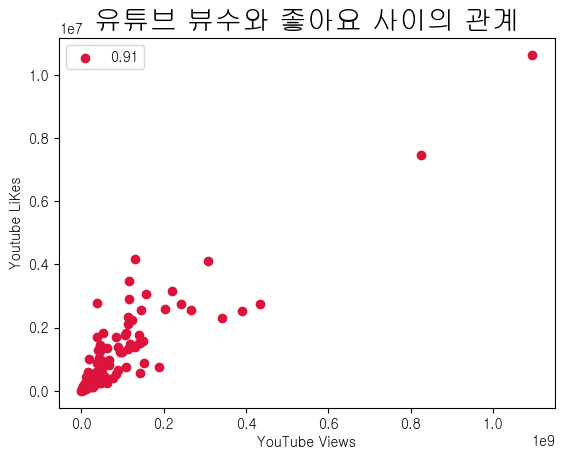

In [20]:
plt.scatter(dataDF['YouTube Views'],dataDF['YouTube Likes'],label=round(datacor.iloc[1,2],2),color='crimson')
plt.xlabel('YouTube Views')
plt.ylabel('Youtube LiKes')
plt.title('유튜브 뷰수와 좋아요 사이의 관계',fontsize=20)
plt.legend()
plt.show()

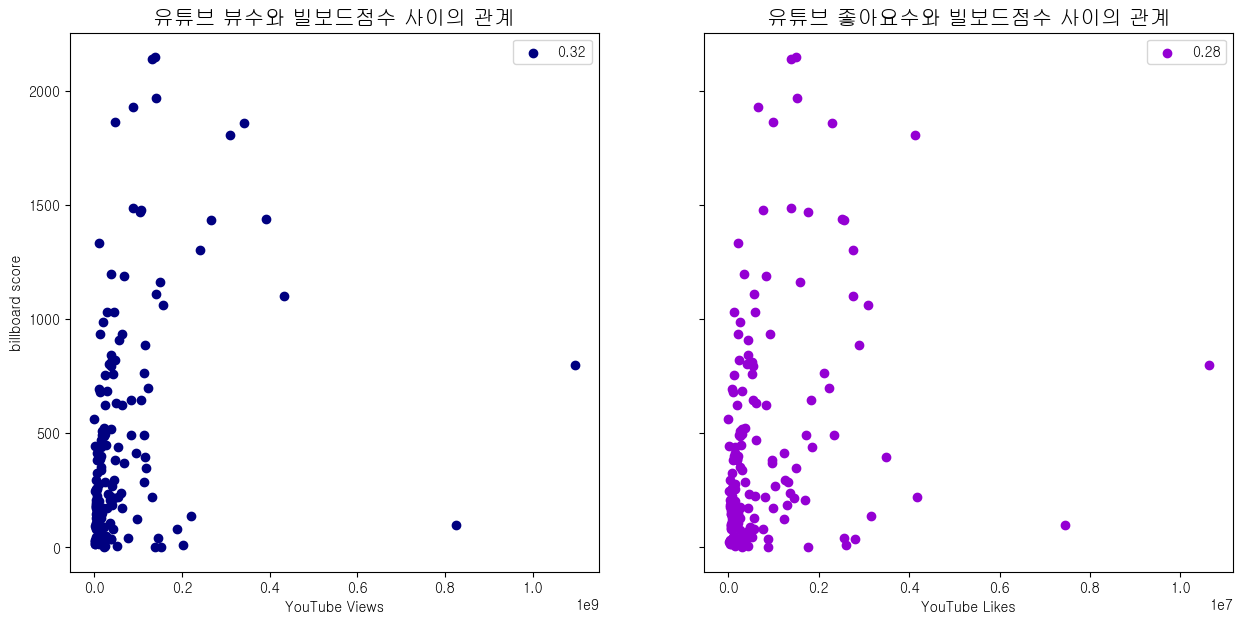

In [21]:
fig=plt.figure(figsize=(15,7))
billtube_1=fig.subplots(1,2,sharey=True)
billtube_1[0].scatter(dataDF['YouTube Views'],dataDF['score'],label=round(datacor.iloc[1,0],2),color='navy')
billtube_1[0].set_xlabel('YouTube Views')
billtube_1[0].set_ylabel('billboard score')
billtube_1[0].legend()
billtube_1[0].set_title('유튜브 뷰수와 빌보드점수 사이의 관계',fontsize=15)

billtube_1[1].scatter(dataDF['YouTube Likes'],dataDF['score'],label=round(datacor.iloc[2,0],2),color='darkviolet')
billtube_1[1].set_xlabel('YouTube Likes')
billtube_1[1].set_title('유튜브 좋아요수와 빌보드점수 사이의 관계',fontsize=15)
billtube_1[1].legend()

plt.show()

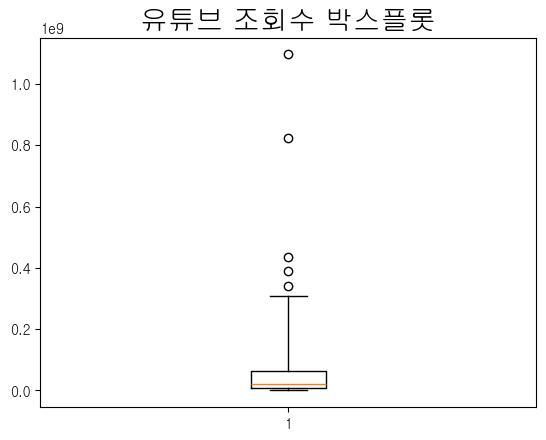

In [22]:
box_view=plt.boxplot(dataDF['YouTube Views'],whis=5)
plt.title('유튜브 조회수 박스플롯',fontsize=20)
plt.show()

In [23]:
box_view['caps'][0].get_data()
view_up=list(box_view['caps'][1].get_data())[1][1]

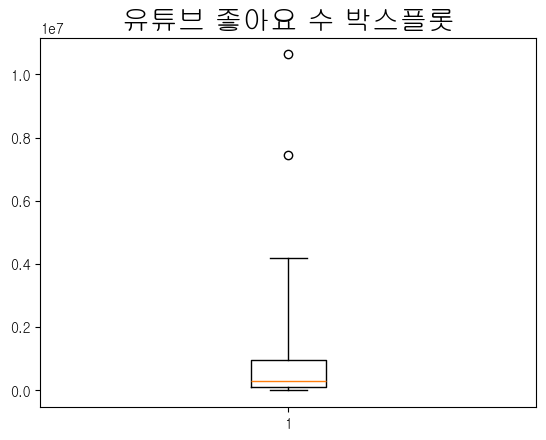

In [24]:
box_like=plt.boxplot(dataDF['YouTube Likes'],whis=5)
plt.title('유튜브 좋아요 수 박스플롯',fontsize=20)
plt.show()

In [25]:
box_like['caps'][0].get_data()
like_up=list(box_like['caps'][1].get_data())[1][1]

In [26]:
# 이상치 제거
bill_youtube=dataDF[(dataDF['YouTube Views']<view_up)&(dataDF['YouTube Likes']<like_up)]

In [27]:
bill_youtube.info()

<class 'pandas.core.frame.DataFrame'>
Index: 162 entries, 0 to 168
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Track          162 non-null    object 
 1   Artist         162 non-null    object 
 2   score          162 non-null    int64  
 3   YouTube Views  162 non-null    float64
 4   YouTube Likes  162 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 7.6+ KB


In [28]:
biltubecor=bill_youtube.corr(numeric_only=True)
biltubecor

,score,YouTube Views,YouTube Likes
score,1.000000,0.456579,0.322145
YouTube Views,0.456579,1.000000,0.822864
YouTube Likes,0.322145,0.822864,1.000000


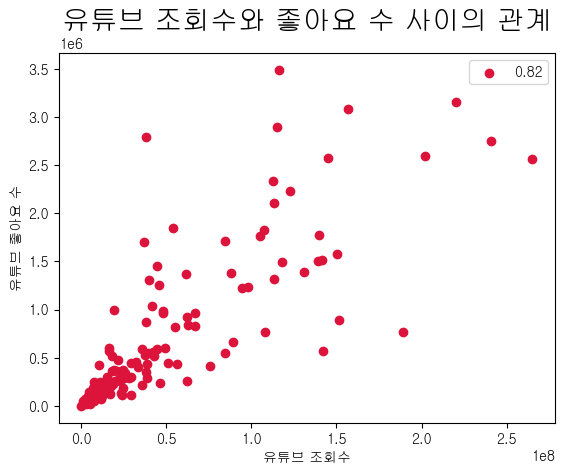

In [29]:
plt.scatter(bill_youtube['YouTube Views'],bill_youtube['YouTube Likes'],label=round(biltubecor.iloc[1,2],2),color='crimson')
plt.xlabel('유튜브 조회수')
plt.ylabel('유튜브 좋아요 수')
plt.title('유튜브 조회수와 좋아요 수 사이의 관계',fontsize=20)
plt.legend()
plt.show()

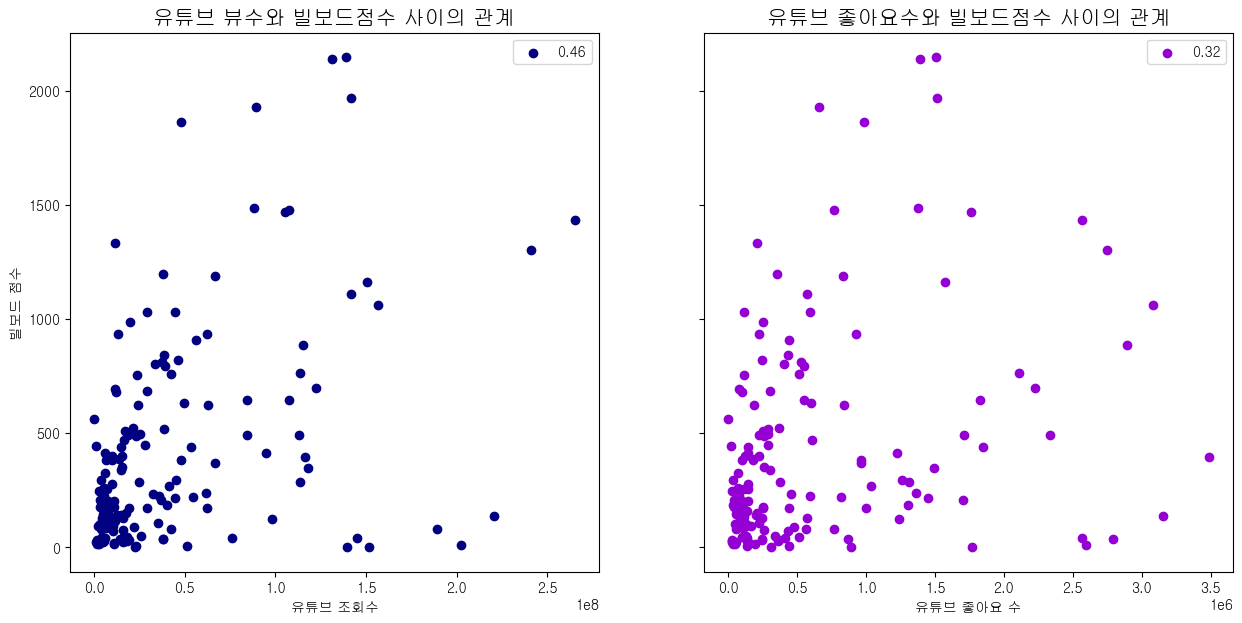

In [30]:
fig=plt.figure(figsize=(15,7))
billtube_2=fig.subplots(1,2,sharey=True)
billtube_2[0].scatter(bill_youtube['YouTube Views'],bill_youtube['score'],label=round(biltubecor.iloc[1,0],2),color='navy')
billtube_2[0].set_xlabel('유튜브 조회수')
billtube_2[0].set_ylabel('빌보드 점수')
billtube_2[0].set_title('유튜브 뷰수와 빌보드점수 사이의 관계',fontsize=15)
billtube_2[0].legend()

billtube_2[1].scatter(bill_youtube['YouTube Likes'],bill_youtube['score'],label=round(biltubecor.iloc[2,0],2),color='darkviolet')
billtube_2[1].set_xlabel('유튜브 좋아요 수')
billtube_2[1].set_title('유튜브 좋아요수와 빌보드점수 사이의 관계',fontsize=15)
billtube_2[1].legend()

plt.show()